In [136]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.svm import SVC

In [105]:
data = pd.read_csv(r'C:\Users\anget\OneDrive\Desktop\DS_test\data.csv')

In [106]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Label
0,45.0,26.850000,92.0,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
1,49.0,21.367521,78.0,2.640,0.507936,6.3339,3.886145,22.94254,737.672,2
2,72.0,25.590000,82.0,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2
3,44.0,20.760000,86.0,7.553,1.600000,14.0900,20.320000,7.64000,63.610,1
4,47.0,22.030000,84.0,2.869,0.590000,26.6500,38.040000,3.32000,191.720,1


In [107]:
print('Our dataset has',len(data),'samples')

Our dataset has 116 samples


In [108]:
data.isnull().sum()

Age            5
BMI            1
Glucose        1
Insulin        3
HOMA           3
Leptin         2
Adiponectin    2
Resistin       0
MCP.1          3
Label          0
dtype: int64

In [109]:
print('On our dataset for the column Age we have 5 missing values')
print('On our dataset for the column BMI we have 1 missing value')
print('On our dataset for the column Glugose we have 1 missing value')
print('On our dataset for the column Insulin we have 3 missing values')
print('On our dataset for the column HOMA we have 3 missing values')
print('On our dataset for the column Leptin we have 2 missing values')
print('On our dataset for the column Adiponectin we have 2 missing values')
print('On our dataset for the column MCP.1 we have 3 missing values')

On our dataset for the column Age we have 5 missing values
On our dataset for the column BMI we have 1 missing value
On our dataset for the column Glugose we have 1 missing value
On our dataset for the column Insulin we have 3 missing values
On our dataset for the column HOMA we have 3 missing values
On our dataset for the column Leptin we have 2 missing values
On our dataset for the column Adiponectin we have 2 missing values
On our dataset for the column MCP.1 we have 3 missing values


In [110]:
patients_with_cancer = data[data['Label']==2]

In [111]:
data_where_we_remove_nan_values = data.dropna()

In [112]:
data_where_we_remove_nan_values

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Label
0,45.0,26.850000,92.0,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
1,49.0,21.367521,78.0,2.640,0.507936,6.3339,3.886145,22.94254,737.672,2
2,72.0,25.590000,82.0,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2
3,44.0,20.760000,86.0,7.553,1.600000,14.0900,20.320000,7.64000,63.610,1
4,47.0,22.030000,84.0,2.869,0.590000,26.6500,38.040000,3.32000,191.720,1
...,...,...,...,...,...,...,...,...,...,...
111,57.0,34.838148,95.0,12.548,2.940415,33.1612,2.364950,9.95420,655.834,2
112,72.0,23.620000,105.0,4.420,1.144780,21.7800,17.860000,4.82000,195.940,2
113,40.0,27.636054,103.0,2.432,0.617890,14.3224,6.783870,26.01360,293.123,2
114,52.0,30.801249,87.0,30.212,6.483495,29.2739,6.268540,24.24591,764.667,2


In [113]:
patients_with_cancer.head()
print('Number of patients with cancer is',len(patients_with_cancer))

Number of patients with cancer is 64


In [114]:
patients_with_cancer_and_under_50_years_old = patients_with_cancer[patients_with_cancer['Age']<50]

In [115]:
patients_with_cancer_and_under_50_years_old.head()
print('Number of patients with cancer and the patients are under 50 years old is',len(patients_with_cancer_and_under_50_years_old))

Number of patients with cancer and the patients are under 50 years old is 28


In [116]:
patients_with_cancer_and_under_50_years_old.dropna().head()
print('Number of patients with cancer, with no missing values and the patients are under 50 years old is',len(patients_with_cancer_and_under_50_years_old.dropna()))

Number of patients with cancer, with no missing values and the patients are under 50 years old is 24


In [117]:
print('The proportion of patients with cancer and are under 50 years old is 43.75%')

The proportion of patients with cancer and are under 50 years old is 43.75%


In [118]:
print('Number of patients with cancer and without missigin values is',len(patients_with_cancer.dropna()))

Number of patients with cancer and without missigin values is 52


In [119]:
print('The proportion of patients with cancer and are under 50 years old and without missing values is')
print('46.154%')

The proportion of patients with cancer and are under 50 years old and without missing values is
46.154%


# Question: what proportion of patients with identified cancer are belowe 50 years of age?
### Answer: If we do not ignore the missing values the proportion is 43.75%. We have 64 patients with cancer and 28 are under 50 years old.
### If we remove all the samples with missing values, then the proportion is 46,154%. If we remove the samples with missing values from the patients with cancer, we reduce the samples from 64 to 52, and the respective patients under 50 from 28 are 24

# Question: What is the standard deviation of resistin?

In [120]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Label
count,111.000000,115.000000,115.000000,113.000000,113.000000,114.000000,114.000000,116.000000,113.000000,116.000000
mean,57.297297,27.563018,97.808696,10.172336,2.666895,26.648911,10.244530,14.725966,538.201381,1.551724
std,16.349365,5.037874,22.623112,10.152083,3.620716,19.253833,6.878735,12.390646,349.065274,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.946410,85.500000,4.420000,0.960273,12.360750,5.480153,6.881763,270.142000,1.000000
50%,57.000000,27.636054,92.000000,6.042000,1.383997,20.271000,8.352692,10.827740,473.859000,2.000000
75%,71.000000,31.244295,102.000000,11.910000,2.853119,36.890300,11.871990,17.755207,703.973000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


# Answer: The standard deviation of resistin is 12.39

In [121]:
len(patients_with_cancer_and_under_50_years_old)

28

In [122]:
patients_with_cancer_and_over_50_years_old = patients_with_cancer[patients_with_cancer['Age']>=50]

In [123]:
len(patients_with_cancer_and_over_50_years_old)

34

In [124]:
len(patients_with_cancer.Age.dropna())

62

In [125]:
under_50_years_old = pd.Series(np.zeros(len(patients_with_cancer_and_under_50_years_old)), name='under_over')
over_50_years_old = pd.Series(np.ones((len(patients_with_cancer_and_over_50_years_old))), name='under_over')

In [126]:
under_or_over_50_years_old = pd.concat([under_50_years_old,over_50_years_old], axis=0, names='under_over')

In [127]:
len(under_or_over_50_years_old)

62

In [128]:
under_or_over_50_years_old = under_or_over_50_years_old.reset_index()

In [129]:
under_or_over_50_years_old.drop(columns='index',inplace=True)

In [130]:
patients_with_cancer_under_and_over_50_years_old = pd.concat([patients_with_cancer_and_under_50_years_old,patients_with_cancer_and_over_50_years_old],axis=0)

In [131]:
patients_with_cancer_under_and_over_50_years_old = patients_with_cancer_under_and_over_50_years_old.reset_index()

In [132]:
patients_with_cancer_under_and_over_50_years_old.drop(columns = 'index',inplace=True)

In [133]:
patients_with_cancer_under_and_over_50_years_old = pd.concat([patients_with_cancer_under_and_over_50_years_old, under_or_over_50_years_old], axis = 1)

In [134]:
patients_with_cancer_under_and_over_50_years_old

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Label,under_over
0,45.0,26.850000,92.0,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2,0.0
1,49.0,21.367521,78.0,2.640,0.507936,6.3339,3.886145,22.94254,737.672,2,0.0
2,46.0,22.210000,86.0,36.940,7.836205,NaN,9.760000,5.68000,312.000,2,0.0
3,45.0,21.303949,102.0,13.852,3.485163,7.6476,21.056625,23.03408,552.444,2,0.0
4,34.0,24.242424,92.0,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...
57,68.0,35.560000,131.0,8.150,2.633537,17.8700,11.900000,4.19000,198.400,2,1.0
58,85.0,27.688778,196.0,51.814,25.050342,70.8824,7.901685,55.21530,1078.359,2,1.0
59,57.0,34.838148,95.0,12.548,2.940415,33.1612,2.364950,9.95420,655.834,2,1.0
60,72.0,23.620000,105.0,4.420,1.144780,21.7800,17.860000,4.82000,195.940,2,1.0


# Question: Compare the BMI for patients with cancer and over 50 with the respective distribution with under 50

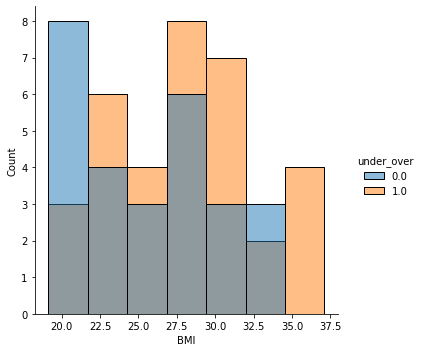

In [137]:
sns.displot(patients_with_cancer_under_and_over_50_years_old, x="BMI", hue="under_over")

### with blue is the distribution of the people under 50 and with orange the group over 50

### The blue distribution the group of people with cancer and are under 50 years old seems to be positively skewed

In [138]:
patients_with_cancer_under_and_over_50_years_old.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Label,under_over
0,45.0,26.850000,92.0,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2,0.0
1,49.0,21.367521,78.0,2.640,0.507936,6.3339,3.886145,22.94254,737.672,2,0.0
2,46.0,22.210000,86.0,36.940,7.836205,NaN,9.760000,5.68000,312.000,2,0.0
3,45.0,21.303949,102.0,13.852,3.485163,7.6476,21.056625,23.03408,552.444,2,0.0
4,34.0,24.242424,92.0,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2,0.0


In [139]:
len(patients_with_cancer_and_over_50_years_old)

34

## According to this link:https://www.cdc.gov/diabetes/basics/getting-tested.html,
   ##     fasting blood glucose under 99mg/dl is considered normal so the threshold is 100 for glucose
## According to this link: https://www.medicinenet.com/what_is_a_high_insulin_level/article.htm,  the normal values of Fasting insulin is less than 25

In [140]:
data_with_greater_insulin = data[data['Insulin']>=25]
data_greater_insulin_glucose = data_with_greater_insulin[data_with_greater_insulin['Glucose']>=100]
data_greater_insulin_glucose_50_plus = data_greater_insulin_glucose[data_greater_insulin_glucose['Age']>=50]

In [141]:
data_greater_insulin_glucose_50_plus

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Label
52,60.0,31.231410,131.0,30.130,NaN,37.8430,8.404430,11.50005,396.021,2
88,86.0,26.666667,201.0,41.611,20.630734,47.6470,5.357135,24.37010,1698.440,2
91,76.0,27.100000,110.0,26.211,7.111918,21.7780,4.935635,8.49395,45.843,1
109,85.0,27.688778,196.0,51.814,25.050342,70.8824,7.901685,55.21530,1078.359,2


# Produce Summary statistics

### Summary Statistics for all the data

In [142]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Label
count,111.000000,115.000000,115.000000,113.000000,113.000000,114.000000,114.000000,116.000000,113.000000,116.000000
mean,57.297297,27.563018,97.808696,10.172336,2.666895,26.648911,10.244530,14.725966,538.201381,1.551724
std,16.349365,5.037874,22.623112,10.152083,3.620716,19.253833,6.878735,12.390646,349.065274,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.946410,85.500000,4.420000,0.960273,12.360750,5.480153,6.881763,270.142000,1.000000
50%,57.000000,27.636054,92.000000,6.042000,1.383997,20.271000,8.352692,10.827740,473.859000,2.000000
75%,71.000000,31.244295,102.000000,11.910000,2.853119,36.890300,11.871990,17.755207,703.973000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


### Summary statistics for patient who do not have cancer

In [143]:
data_with_no_cancer = data[data['Label']==1]

In [144]:
data_with_no_cancer.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Label
count,49.000000,52.000000,51.000000,51.000000,51.000000,51.000000,51.000000,52.000000,52.000000,52.0
mean,58.224490,28.317336,88.078431,6.983922,1.568480,26.391355,10.354233,11.614813,499.730692,1.0
std,19.387781,5.427465,10.232972,4.894541,1.224791,19.444339,7.704884,11.447053,292.242157,0.0
min,24.000000,18.670000,60.000000,2.707000,0.467409,4.311000,2.194280,3.291750,45.843000,1.0
25%,38.000000,23.096003,82.500000,4.263000,0.898747,11.360500,5.445953,6.597523,260.736500,1.0
50%,66.000000,27.694389,87.000000,5.537000,1.145436,21.211700,8.125550,8.929190,471.322500,1.0
75%,75.000000,32.328091,92.500000,7.185000,1.796510,35.740500,11.073142,12.808525,642.933500,1.0
max,89.000000,38.578759,118.000000,26.211000,7.111918,83.482100,38.040000,82.100000,1256.083000,1.0


### Summary statistics for patients who have cancer and are under 50 years old

In [145]:
patients_with_cancer_and_under_50_years_old.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Label
count,28.000000,27.000000,28.000000,28.000000,28.000000,27.000000,27.000000,28.000000,27.000000,28.0
mean,44.392857,25.820610,100.892857,13.265893,3.480772,21.046737,11.161874,18.902754,581.697444,2.0
std,3.593608,4.407660,23.735174,13.937656,3.857876,14.360579,5.662208,12.897070,395.119965,0.0
min,34.000000,19.560000,70.000000,2.432000,0.507936,6.333900,3.886145,4.620000,193.870000,2.0
25%,42.750000,21.363718,91.500000,3.989000,0.819427,11.751150,6.669915,9.840445,297.166500,2.0
50%,45.000000,26.562500,96.000000,7.073000,1.426167,16.735300,9.760000,16.105160,518.586000,2.0
75%,46.500000,29.340816,103.000000,17.342250,5.011110,24.814750,14.797433,23.054985,737.853000,2.0
max,49.000000,33.180000,199.000000,58.460000,15.285341,54.680000,21.823745,53.671700,1698.440000,2.0


### Summary statistics for patients who have cancer and are over 50 old

In [146]:
patients_with_cancer_and_over_50_years_old.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Label
count,34.000000,34.000000,34.000000,32.000000,32.000000,34.000000,34.000000,34.000000,32.000000,34.0
mean,66.588235,28.037491,109.352941,12.719094,3.749900,32.334894,9.423293,16.331458,570.553156,2.0
std,10.108855,4.544052,29.189955,11.482748,5.305155,21.491820,6.669294,12.633251,403.044707,0.0
min,51.000000,19.132653,77.000000,2.740000,0.570392,8.016300,1.656020,3.270000,90.090000,2.0
25%,59.000000,24.541614,92.000000,5.684000,1.314443,15.436800,4.927273,7.541225,302.909250,2.0
50%,65.500000,28.282828,100.000000,8.909500,2.313323,28.041000,8.207215,12.736220,437.487000,2.0
75%,72.000000,31.142006,117.250000,16.595250,3.565746,40.756450,10.922973,19.825962,770.725750,2.0
max,86.000000,37.109375,201.000000,51.814000,25.050342,90.280000,33.750000,55.215300,1698.440000,2.0


# Inferences after the statistics.
###  Patients with cancer has larger levels of Glucose, Insulin, HOMA than patients with no cancer

# Pairplots

### For patients who suffer from cancer there are positive correlations for the combination of the features Glucose-Insulin, Glucose-HOMA and Insulin-Homa

# Can we use them to predict/impute the missing values on the GLucose, Insulin and Homa features?

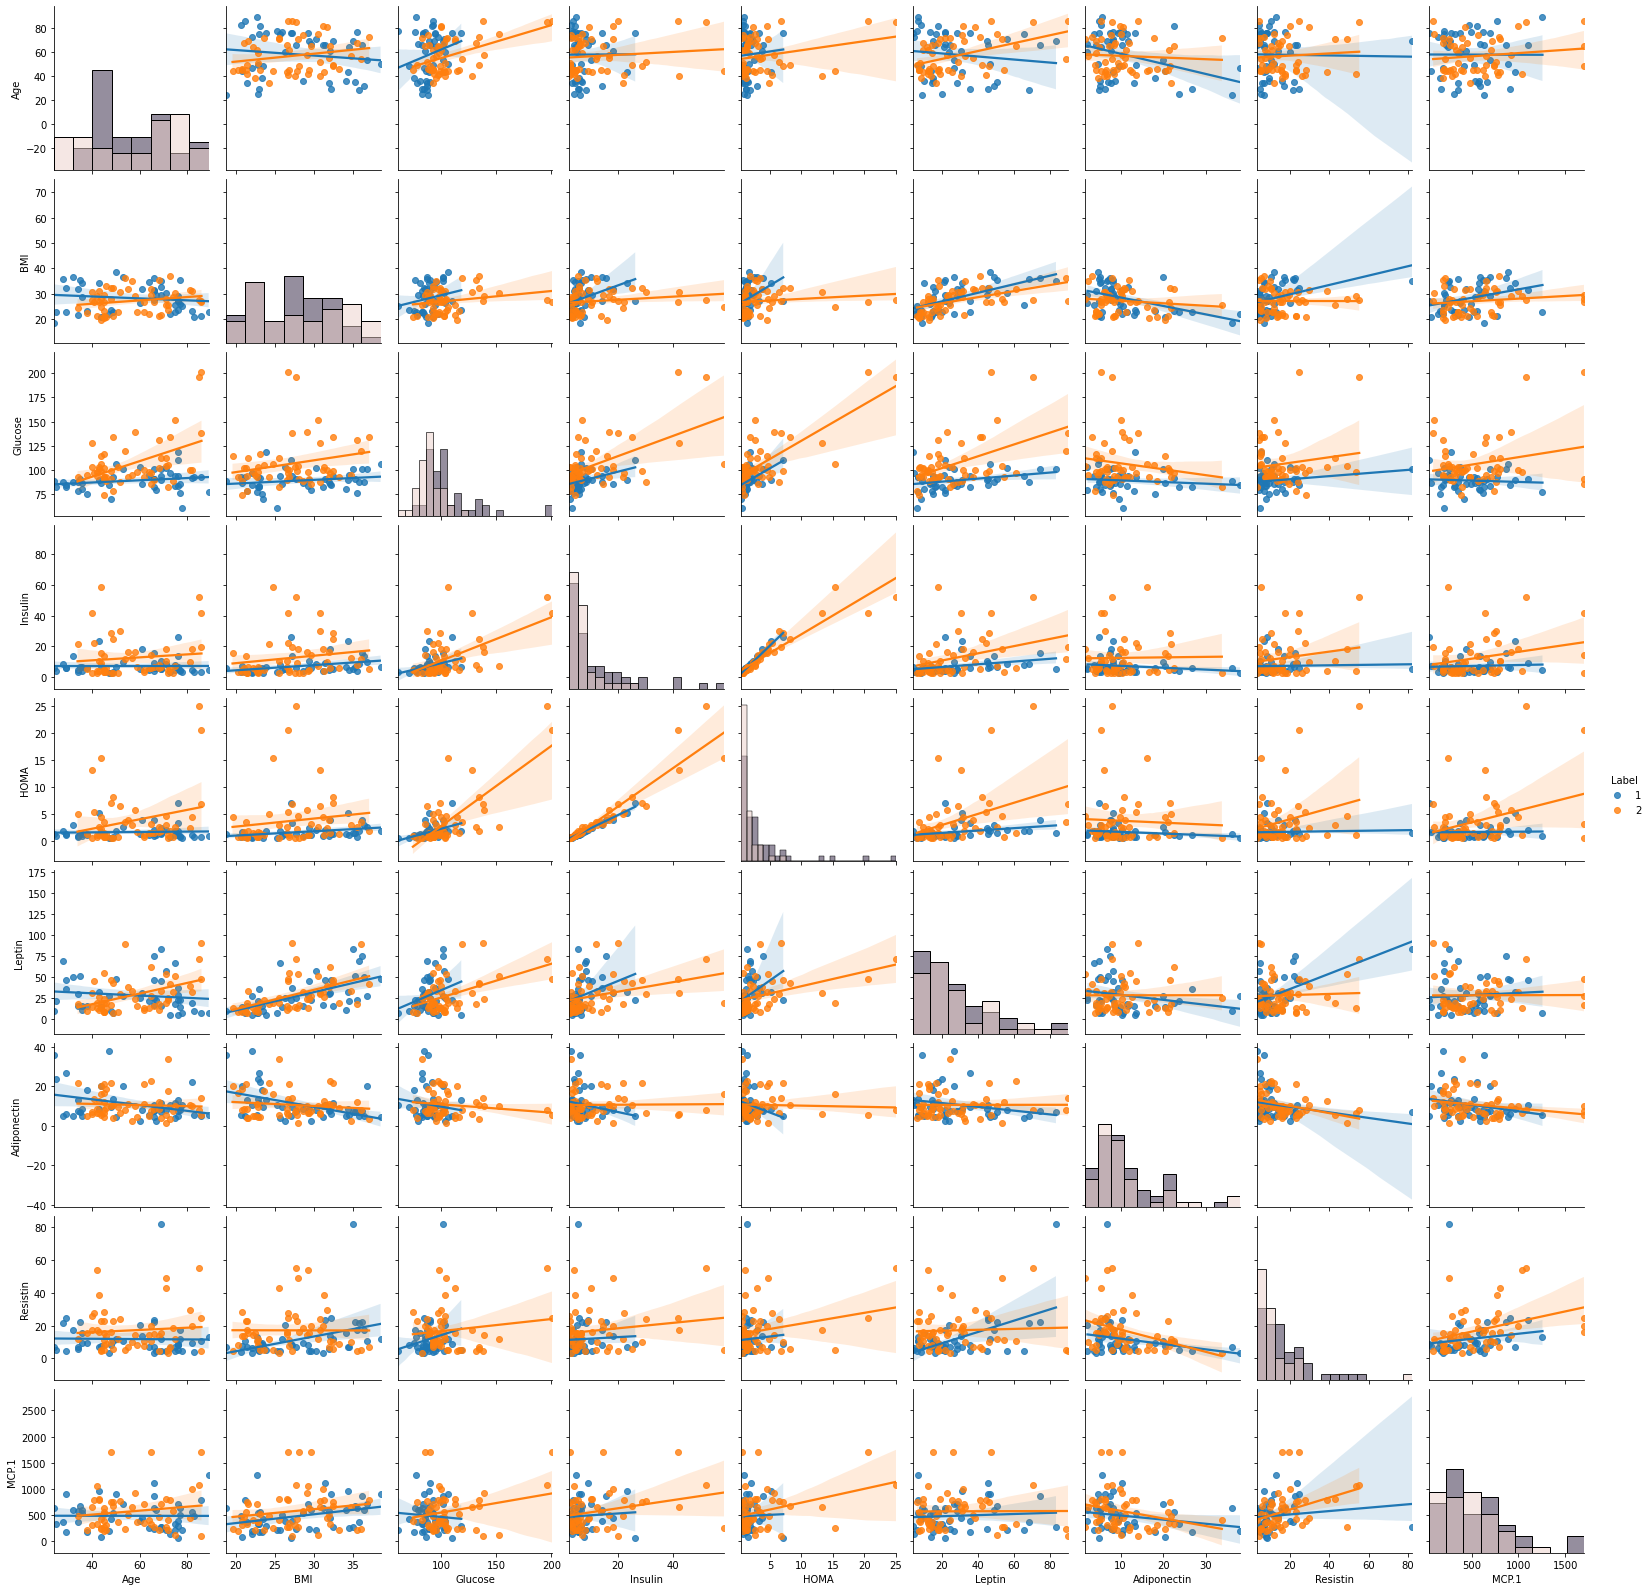

In [147]:
sns.pairplot(data.dropna(),kind="reg",hue='Label', diag_kind = 'hist')

# Positive correlation for the combinations (Glucose,Insulin), (Glucose,HOMA) and (Insulin,Homa), we expect these features to play a vital role for the classification.

### PCA for dimensionality reduction and vizualizations

In [148]:
data_for_pca = data.iloc[:,0:-1]

In [149]:
data_for_pca.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,45.0,26.850000,92.0,3.330,0.755688,54.6800,12.100000,10.96000,268.230
1,49.0,21.367521,78.0,2.640,0.507936,6.3339,3.886145,22.94254,737.672
2,72.0,25.590000,82.0,2.820,0.570392,24.9600,33.750000,3.27000,392.460
3,44.0,20.760000,86.0,7.553,1.600000,14.0900,20.320000,7.64000,63.610
4,47.0,22.030000,84.0,2.869,0.590000,26.6500,38.040000,3.32000,191.720


In [150]:
data_for_pca = data_for_pca.dropna()

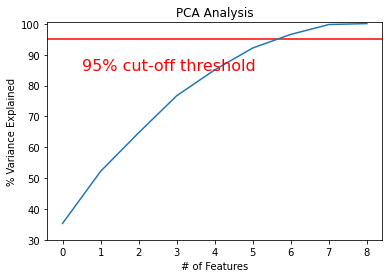

In [151]:
scaler = StandardScaler()
data_rescaled = scaler.fit_transform(data_for_pca)
covar_matrix = PCA(n_components = 9)
covar_matrix.fit(data_rescaled)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)

plt.axhline(y=95, color='r', linestyle='-')
plt.text(0.5, 85, '95% cut-off threshold', color = 'red', fontsize=16)

plt.plot(var)

In [152]:
var

array([ 35.3,  52.2,  64.7,  76.7,  85.1,  92.2,  96.6,  99.8, 100.1])

### 2 components explain the 52.2 percentage of information

In [153]:
def plot_2d_label(X_2d, y, ax=None, s=2, alpha=0.5, lw=2):
    """Visualise a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional projection of the original data.
    
    y : ndarray, shape (n_samples,)
        Labels for the respective samples in X_2d.
        
    ax : matplotlib axes.Axes 
         axes to plot on
         
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    
    targets = np.unique(y)  # extract the unique number of labels
    colors = sns.color_palette(n_colors=targets.size)
    
    if ax is None:
        fig, ax = plt.subplots()
        
    # scatter plot    
    for color, target in zip(colors, targets):
        ax.scatter(X_2d[y == target, 0], X_2d[y == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)
    
    # add legend
    ax.legend(loc='center left', bbox_to_anchor=[1.01, 0.5], scatterpoints=3, frameon=False); # Add a legend outside the plot at specified point
    
    return ax

In [154]:
auxilary_data_frame = data.dropna()

In [155]:
labels = auxilary_data_frame.iloc[:,-1]

In [156]:
len(data_rescaled)

97

<AxesSubplot:>

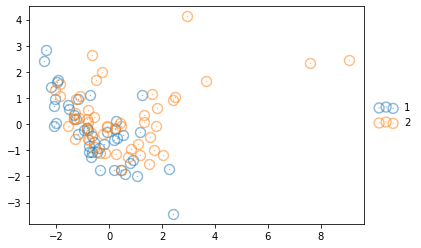

In [157]:
covar_matrix = PCA(n_components = 2) #40 features covers ~98% variance

#calculate eigenvalues
covar_matrix.fit(data_rescaled)

X_pca = covar_matrix.transform(data_rescaled)
plot_2d_label(X_pca, labels, ax=None, s=2, alpha=0.5, lw=10)

## There are some outliers but we have small dataset and there no reason to remove the outliers on the upper right corner of scatter plot.
## Since we have small number of features and samples we do not need a model with too many parameters, because this model is sensitive to overfitting. So a logistic regression such as Lasso, or Linear Discriminant analysis can be great models to test if this dataset give model with real performance.

# Question: Are there particular patient types?

### Answer: According to former links, patients with more than 199 Glucose, are suffering from Diabetes. So we have the type of a patient who suffer from Diabetes.

In [158]:
dataer = data[data['Glucose']>200]

In [159]:
dataer

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Label
88,86.0,26.666667,201.0,41.611,20.630734,47.647,5.357135,24.3701,1698.44,2


### Q: Have you identified problems with the provided data, and if yes how do they affect modelling?

### Answer: 1)One problem is that the dataset is small, 116 samples in total. 64 patients suffer from cancer and 52 do not suffer from cancer.

### In case with Small datasets, it is quite possible to obtain overfitted models


###                2)Second problem for this dataset, is the fact that there are samples with missing values. Imputating missing values on a limited number of observation which observations can have measurements errors, as well, this makes it ever more diffcult to predict accurate estimates for the missing values. According to the paper "To Impute or not Impute: That's the Question, when we delete data with missing values this leads to a decrease in statistical power of the models by 35% if 10% of data is missing and 98% if 30% of data is missing. 
### Overall from the second argument, from our dataset, this proportion of samples which has missing values is 16,38% this reduce the statistical power of our model if we delete them. Imputation may be a solution to this problem. Not 100% that we have a reliable/robust model. Maybe the dataset is a small description of the underlying information that we try to find and as a result we have a small part learning region which can be given to the classifier.

# P.S link of the paper: https://www.paultwin.com/wp-content/uploads/Lodder_1140873_Paper_Imputation.pdf


# I would need more data in order to provide a more robust model.

# Question: What are your recommendation regarding future data collection?

### Answer: First of all it seems that the high level of Glucose, insulin and HOMA can give significant information for better separation of the patients. So first of all during the data collection we have to make sure that we do not miss these features. Second idea is, to find on literature all the substances that have positive or negative correlation with the features Glucose, Insulin and HOMA. In other words, suppose that we find a feature that has the same behaviour with Glucose but we miss the Glucose value. Then if we have a large dataset we can either predict the Glucose or use a classifier that take into consideration all the features apart from the Glucose

# Modelling
### For preprocessing we standardize the data set

In [160]:
removed_missing_values = data.dropna()
labels = removed_missing_values.iloc[:,-1]
removed_missing_values_data = removed_missing_values.iloc[:,:-1]

In [161]:
removed_missing_values_data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,45.0,26.850000,92.0,3.330,0.755688,54.6800,12.100000,10.96000,268.230
1,49.0,21.367521,78.0,2.640,0.507936,6.3339,3.886145,22.94254,737.672
2,72.0,25.590000,82.0,2.820,0.570392,24.9600,33.750000,3.27000,392.460
3,44.0,20.760000,86.0,7.553,1.600000,14.0900,20.320000,7.64000,63.610
4,47.0,22.030000,84.0,2.869,0.590000,26.6500,38.040000,3.32000,191.720
...,...,...,...,...,...,...,...,...,...
111,57.0,34.838148,95.0,12.548,2.940415,33.1612,2.364950,9.95420,655.834
112,72.0,23.620000,105.0,4.420,1.144780,21.7800,17.860000,4.82000,195.940
113,40.0,27.636054,103.0,2.432,0.617890,14.3224,6.783870,26.01360,293.123
114,52.0,30.801249,87.0,30.212,6.483495,29.2739,6.268540,24.24591,764.667


In [162]:
from sklearn.model_selection import StratifiedShuffleSplit
x_train, x_test, y_train, y_test = train_test_split(removed_missing_values_data, labels, test_size = 0.2, random_state = 0)

folds = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
folds.get_n_splits(x_train, y_train)
from sklearn.metrics import roc_auc_score

### Standardization only of the folds that are destined for the training and transformation of the validation fold,
### thus we prevent data leakage

In [163]:
def train_model(X,y,X_test,folds,model):
    scores=[]
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
        X_train,X_valid = X[train_index],X[valid_index]
        y_train,y_valid = y[train_index],y[valid_index]
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)
        X_test = scaler.transform(X_test)
        model.fit(X_train,y_train)
        y_pred_valid = model.predict(X_valid).reshape(-1,)

        scores.append(roc_auc_score(y_valid, y_pred_valid))

    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

In [164]:
train_model(np.asarray(x_train),np.asarray(y_train),np.asarray(x_test),folds,LinearDiscriminantAnalysis())

CV mean score: 0.7375, std: 0.0612.


In [165]:
train_model(np.asarray(x_train),np.asarray(y_train),np.asarray(x_test),folds,LogisticRegression(penalty='l1',tol=0.01, random_state=0, solver='liblinear'))

CV mean score: 0.7125, std: 0.0306.


In [166]:
train_model(np.asarray(x_train),np.asarray(y_train),np.asarray(x_test),folds,SVC())

CV mean score: 0.7375, std: 0.0919.


In [167]:
train_model(np.asarray(x_train),np.asarray(y_train),np.asarray(x_test),folds,KNeighborsClassifier(n_neighbors=5))

CV mean score: 0.6375, std: 0.1741.


# From these for algorithms we pick the Linear discriminant analysis because has the best cv score and with the smallest std

Test Accuracy for SVC 0.85


C:\Users\anget\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


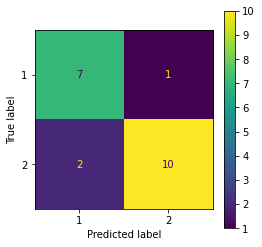

In [168]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

clf = LinearDiscriminantAnalysis()
clf.fit(x_train,y_train)
ca_test_score = clf.score(x_test,y_test)
print('Test Accuracy for SVC',ca_test_score)

fig, ax = plt.subplots(figsize=(4, 4))
    
plot_confusion_matrix(clf, x_test, y_test, ax=ax)

# Question: Evaluate the performance of your model, using appropiate metrics
# Answer: I use cross-validation to evaluate different algorithms and picks the best according to the larger cv_score. Then we retrain the model on all the training set and check the generalization performance on the test set, I plot as well the confusion metric.

# HUGE observation, if I change the random state on the train test split which means different segregation of the datasets, the classifiers gives different cv scores and e.g  SVC wins LDA.

# Inference: We do not have consistency on which classifiers is clearly better, which can be considered logical because at first we have small dataset and on this dataset,I remove the samples with missing values. The deleted samples leads to smaller dataset and models with less statistical power.

### reference the paper To Impute or not Impute with link: https://www.paultwin.com/wp-content/uploads/Lodder_1140873_Paper_Imputation.pdf

# Question which are the most  important features used by the model in order to predict the label

# Our proposed model is a linear discriminant analysis, and is a linear classifier with supervised dimensionality reduction.

# LDA as a linear classifier finds a set of coefficients which are used for the weigh of each feature/importance. 

In [169]:
clf.coef_[0]

array([-0.69607206, -0.74117604,  3.21908381,  4.086803  , -5.46993358,
       -0.22588533, -0.17395938,  0.61052129,  0.33402051])

# From the coefficients here we can see the features 3,4 and 5 are more important fro classification than the other. In particular, the features are Glucose, Insulin and HOMA

# Logical inference since from the pairplot we observed for these three features positive correlation. Moreover we saw that the patients who suffer from cancer have higher levels of Glucose, Insulin and HOMA

# Future plans on this dataset

# Imputation of the missing values.
# Imputation by using regression for the Glucose, insulin and Homa since there is positive correlation.
# For patients with no cancer I would impute the leptin/Adiponetin from regression on Resistin feature.
# For patients with cancer I would impute MPC1 by using regression on the Resistin since there is positive correlation.

# On the scenarion that we obtain with these imputation the same performance we are more confident about the reliability of this model.